# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata,how='left', on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_result = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
duplicated_result

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_data.loc[combined_data['Mouse ID'] != duplicated_result[0]]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_df['Mouse ID'].nunique()

248

In [7]:
index_drugs = new_df.set_index('Drug Regimen')
index_drugs = index_drugs.groupby(['Drug Regimen'])

mean_drug = index_drugs["Tumor Volume (mm3)"].mean()
print(mean_drug) 
median_drug = index_drugs["Tumor Volume (mm3)"].median()
print(median_drug)
variance_drug = index_drugs["Tumor Volume (mm3)"].var()
print(variance_drug)
std_drug = index_drugs["Tumor Volume (mm3)"].std()
print(std_drug)
sem_drug = index_drugs["Tumor Volume (mm3)"].sem()
print(sem_drug)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
index_drugs = new_df.set_index('Drug Regimen')
index_drugs = index_drugs.groupby(['Drug Regimen'])

mean_drug = index_drugs["Tumor Volume (mm3)"].mean()
median_drug = index_drugs["Tumor Volume (mm3)"].median()
variance_drug = index_drugs["Tumor Volume (mm3)"].var()
std_drug = index_drugs["Tumor Volume (mm3)"].std()
sem_drug = index_drugs["Tumor Volume (mm3)"].sem()

drug_statistics = pd.DataFrame({"Mean Tumor Volume": mean_drug ,
                              "Median Tumor Volume": median_drug,
                              "Tumor Volume Variance": variance_drug,
                              "Tumor Volume Std. Dev.": std_drug,
                              "Tumor Volume Std. Err.": sem_drug})

drug_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_stat_agg = new_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
drug_stat_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

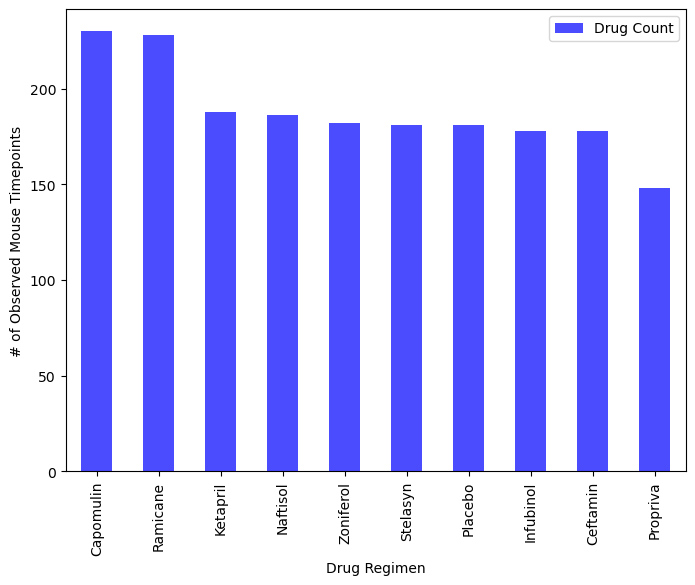

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_amount_per_drug = new_df['Drug Regimen'].value_counts()
stats_for_plot = pd.DataFrame({'Drug Count': total_amount_per_drug})

Bar1 = stats_for_plot.plot(kind="bar", color=["blue"],alpha=0.7, figsize=(8,6))
Bar1.set_ylabel("# of Observed Mouse Timepoints")
Bar1.set_xlabel("Drug Regimen")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

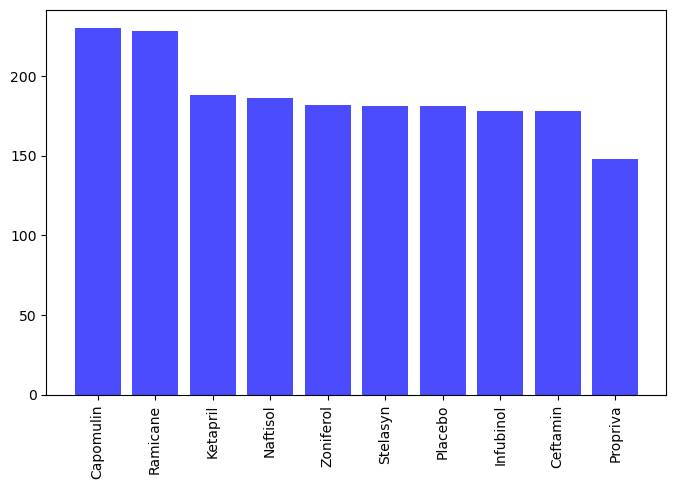

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_amount_per_drug = new_df['Drug Regimen'].value_counts()
stats_for_plot = pd.DataFrame({'Drug Count': total_amount_per_drug})

plt.figure(figsize=(8,5))
plt.bar(stats_for_plot.index, stats_for_plot['Drug Count'],color='b', alpha=0.7,align="center")
plt.xticks(rotation="vertical")

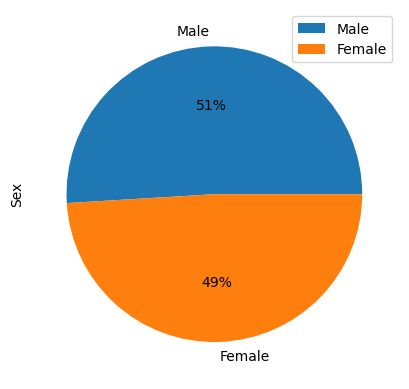

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = new_df['Sex'].value_counts()
stats_for_pie = pd.DataFrame({'Gender': gender_distribution})

Pie1 = stats_for_pie.plot(kind="pie", y='Gender',autopct='%1.0f%%')
Pie1.set_ylabel("Sex")

plt.show()

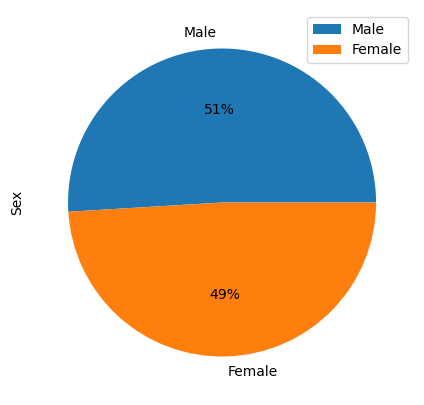

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = new_df['Sex'].value_counts()
stats_for_pie = pd.DataFrame({'Gender': gender_distribution})

Pie1 = stats_for_pie.plot.pie(y='Gender',autopct='%1.0f%%',figsize=(5, 5))
Pie1.set_ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_choices = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

filteration = new_df['Drug Regimen'].isin(drug_choices)
filteration = new_df[filteration]

new_last_values = filteration.groupby('Mouse ID')['Timepoint'].last()
scatter_last_values = filteration.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged = filteration.groupby("Mouse ID").last()

merged['Final Value'] = new_last_values
merged['average tumor volume'] = scatter_last_values
merged

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Value,average tumor volume
Mouse ID,,,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23,45,56.312708
a251,45,65.525743,1,Infubinol,Female,21,25,45,55.237095
a275,45,62.999356,3,Ceftamin,Female,20,28,45,52.770965
a411,45,38.407618,1,Ramicane,Male,3,22,45,40.701385
a444,45,43.047543,0,Ramicane,Female,10,25,45,43.060052
...,...,...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27,45,56.290887
y793,45,31.896238,2,Capomulin,Male,17,17,45,38.506829
y865,45,64.729837,3,Ceftamin,Male,23,26,45,54.998559


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumr_vol = merged.loc[merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(drug_tumr_vol) 
        
    # Determine outliers using upper and lower bounds
    quartiles = drug_tumr_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_tumr_vol.loc[(drug_tumr_vol < lower_bound) | (drug_tumr_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


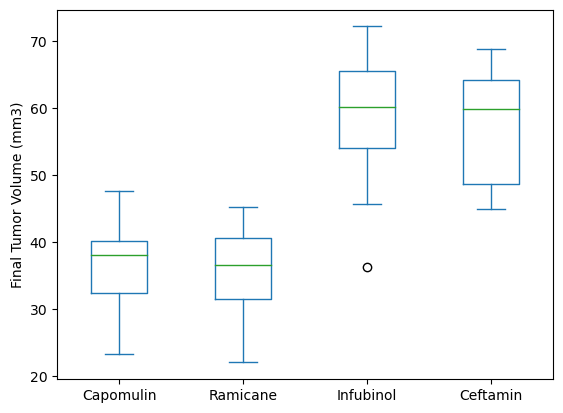

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
first_filterb =merged.loc[(merged['Drug Regimen'] =='Capomulin')]
second_filterb =merged.loc[(merged['Drug Regimen'] =='Ramicane')]
third_filterb =merged.loc[(merged['Drug Regimen'] =='Infubinol')]
fourth_filterb =merged.loc[(merged['Drug Regimen'] =='Ceftamin')]

data = pd.DataFrame({"Capomulin": first_filterb['Tumor Volume (mm3)'],
                    "Ramicane": second_filterb['Tumor Volume (mm3)'],
                    "Infubinol": third_filterb['Tumor Volume (mm3)'],
                    "Ceftamin": fourth_filterb['Tumor Volume (mm3)']})

# Plot the dataframe
ax = data[['Capomulin','Ramicane','Infubinol','Ceftamin']].plot(kind='box',)
plt.ylabel("Final Tumor Volume (mm3)")
# Display the plot
plt.show()

## Line and Scatter Plots

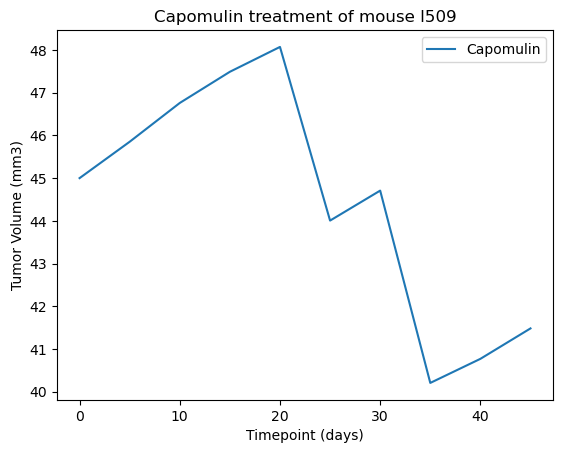

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
adjusted_first_filter = first_filter.loc[(first_filter['Mouse ID'] == 'l509')]
adjusted_first_filter = adjusted_first_filter.sort_values(by='Timepoint', ascending=False)

adjusted_first_filter.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)',label="Capomulin")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

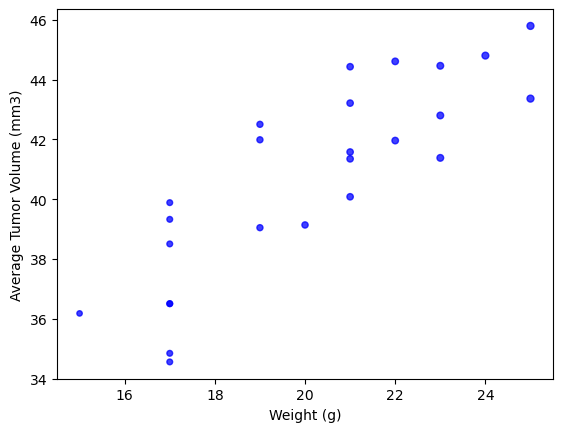

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = merged.loc[(merged['Drug Regimen'] =='Capomulin')]
plt.scatter(scatter_plot['Weight (g)'], scatter_plot['average tumor volume'], facecolors="blue",
            s=scatter_plot['Weight (g)'], alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


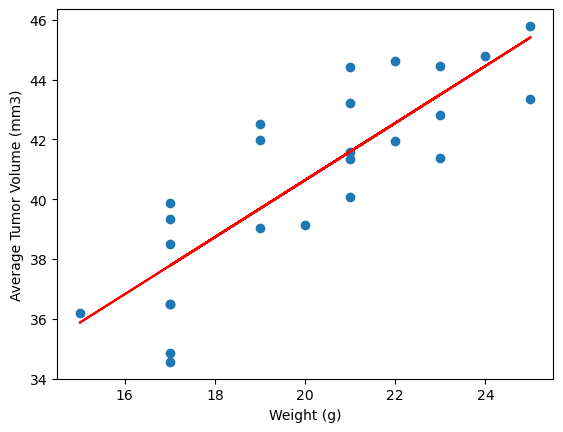

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_value = scatter_plot['Weight (g)']
avg_tumor_V = scatter_plot['average tumor volume']
correlation = st.pearsonr(weight_value,avg_tumor_V)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_value, avg_tumor_V)
regress_values = weight_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_value,avg_tumor_V)
plt.plot(weight_value,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()